## Modeling time series with ARIMA class models

1. Import the libraries:

In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs
from chapter_3_utils import test_autocorrelation

2. Download Google's stock prices and resample to weekly frequency:

In [52]:
df = yf.download('GOOG',
                start='2015-01-01',
                end='2018-12-31',
                progress=False)

goog = df.resample('W') \
         .last() \
         .rename(columns={'Adj Close': 'adj_close'}) \
         .adj_close

3. Apply the first differences to the price series and plot them together:

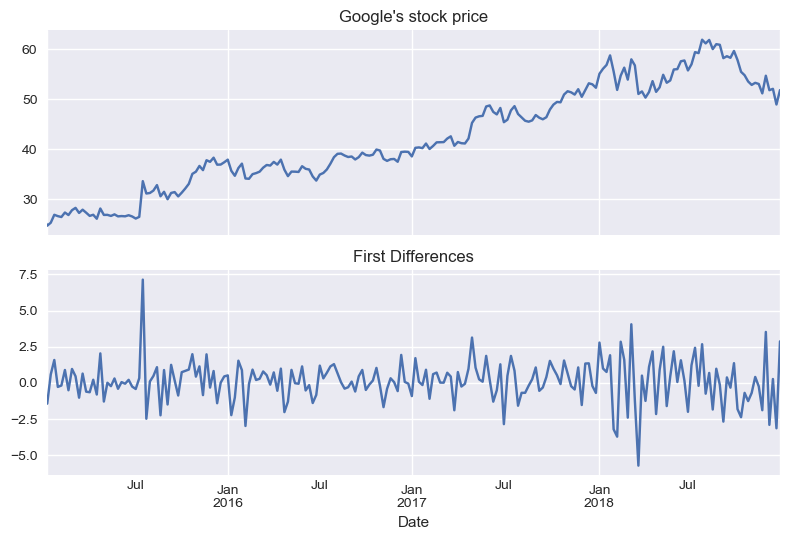

In [53]:
import matplotlib.pyplot as plt

goog_diff = goog.diff().dropna()

fig, ax = plt.subplots(2, sharex=True)
goog.plot(title = "Google's stock price", ax=ax[0])
goog_diff.plot(ax=ax[1], title='First Differences')

plt.tight_layout()
plt.show()

4. Test the differenced series for stationarity:

ADF test statistic: -12.79 (p-val: 0.00)
KPSS test statistic: 0.08 (p-val: 0.10)


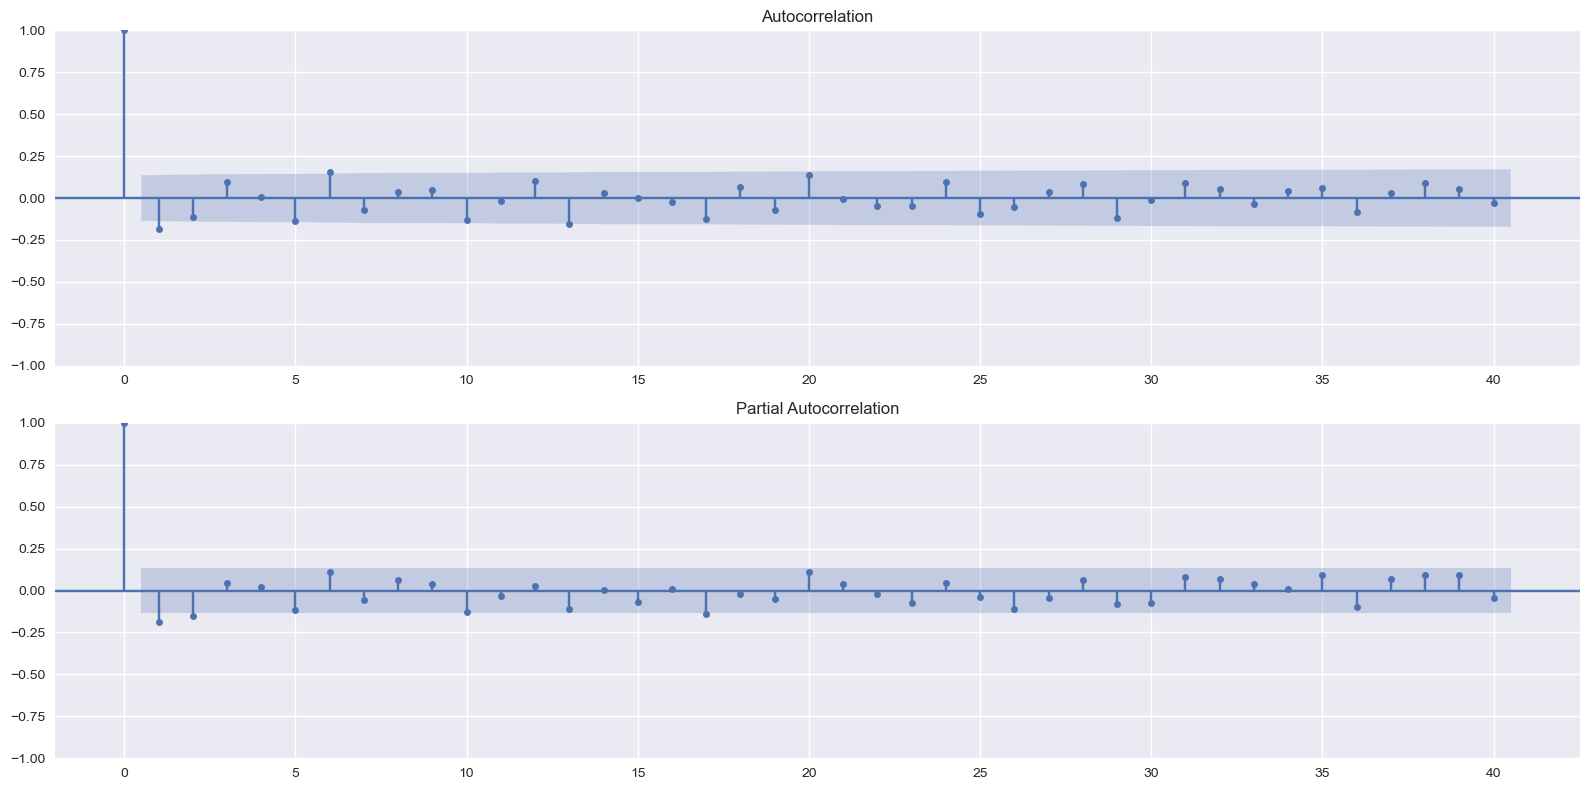

In [54]:
fig = test_autocorrelation(goog_diff)

plt.tight_layout()
plt.show()

5. Based on the results of the tests, specify the ARIMA model and fit it to the data:

In [55]:
arima = ARIMA(goog, order=(2, 1, 1)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  209
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -365.554
Date:                Mon, 15 Apr 2024   AIC                            739.108
Time:                        13:13:03   BIC                            752.458
Sample:                    01-04-2015   HQIC                           744.506
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4062      0.397     -1.024      0.306      -1.184       0.371
ar.L2         -0.1833      0.082     -2.241      0.025      -0.344      -0.023
ma.L1          0.2051      0.405      0.507      0.612      -0.588       0.999
sigma2         1.9673      0.122     16.108      0.000       1.728       2.207
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               107.22
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.11
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
def arima_diagnostics(resids, n_lags=40):
    '''
    Function for diagnosing the fit of an ARIMA model by investigating the residuals.
    
     Parameters
     ----------
     resids : np.array
     An array containing the residuals of a fitted model
     
     n_lags : int
     Number of lags for autocorrelation plot
     
     Returns
     -------
     fig : matplotlib.figure.Figure
     Created figure
     '''''
    
    # create placeholder subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    
    r = resids
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]
    
    # residuals over time
    sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')
    
    # distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = scs.norm.pdf(r_range)
    
    sns.distplot(resids_nonmissing, hist=True, kde=True, 
                norm_hist=True, ax=ax2)
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')
    ax2.set_xlim(x_lim)
    ax2.legend()
    
    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
    ax3.set_title('Q-Q plot')
    
    # ACF plot
    plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05)
    ax4.set_title('ACF plot')
    
    return fig

7. Test the residuals of the fitted ARIMA model:

C:\Users\nking\AppData\Local\Temp\ipykernel_10224\52816951.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids_nonmissing, hist=True, kde=True,


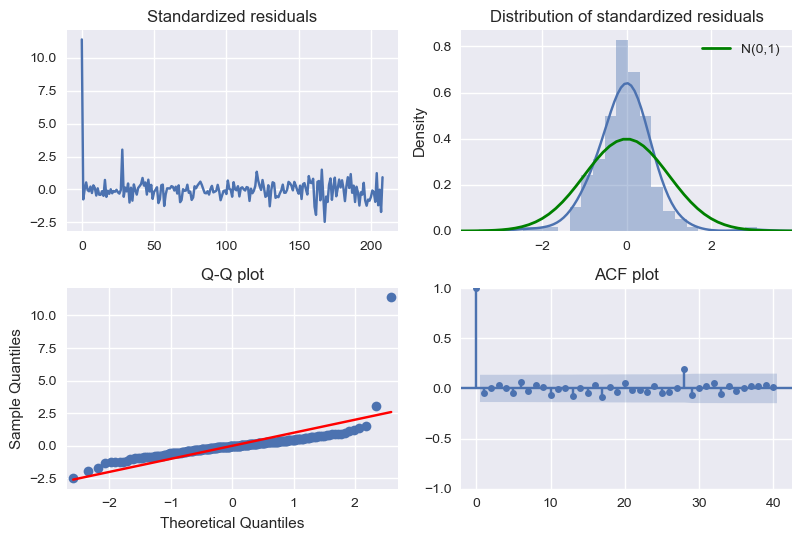

In [57]:
arima_diagnostics(arima.resid, 40)

plt.tight_layout()
plt.show()

8. Apply the Ljung-Box's test for no autocorrelation in the residuals and plot the results:

KeyError: 1

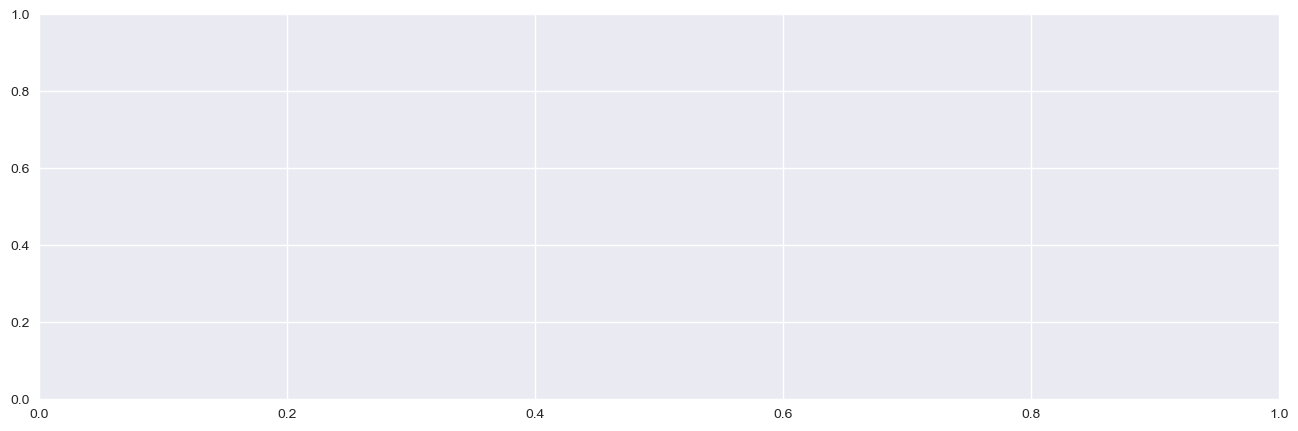

In [59]:
ljung_box_results = acorr_ljungbox(arima.resid)

fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_results[1])), 
                y=ljung_box_results[1], 
                ax=ax)
ax.axhline(0.05, ls='--', c='r')
ax.set(title="Ljung-Box test's results",
       xlabel='Lag',
       ylabel='p-value')

plt.tight_layout()
#plt.savefig('images/ch3_im22.png')
plt.show()

### There's more

1. We start by importing the library:

In [50]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'